https://stepik.org/lesson/222124/step/3?unit=195045

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np


%matplotlib inline
sns.set(rc={'figure.figsize': (9, 6)})

In [26]:
# step_id - id стэпа
# user_id - анонимизированный id юзера
# timestamp - время наступления события в формате unix date
# action - событие, возможные значения: 

# discovered - пользователь перешел на стэп
# viewed - просмотр шага,
# started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
# passed - удачное решение практического шага
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
events_data.head(2)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632


In [27]:
# events_data.iloc[100, 2] = np.nan
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [21]:
# step_id - id стэпа
# timestamp - время отправки решения в формате unix date
# submission_status - статус решения
# user_id - анонимизированный id юзера

submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
submissions_data.head(2)

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853


In [23]:
submissions_data.submission_status.unique()

array(['correct', 'wrong'], dtype=object)

In [35]:
# pd.to_datetime(events_train.timestamp, unit='s').dt.year
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')
events_data['day'] = events_data.date.dt.date
events_data.head(2)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15


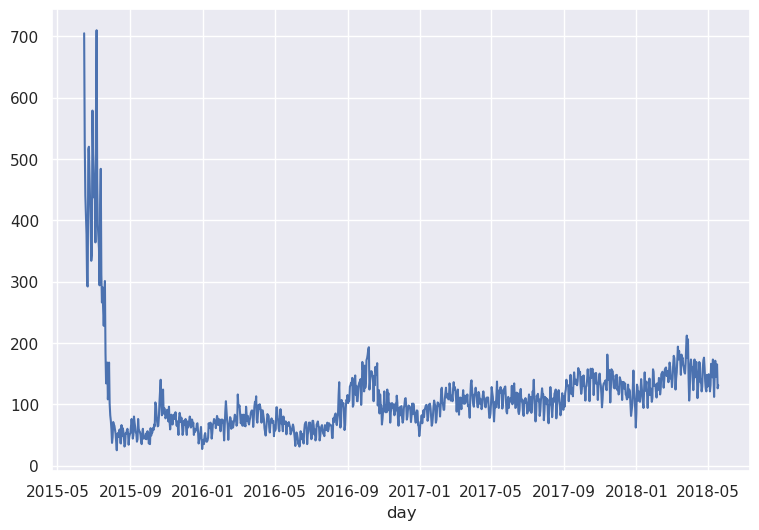

In [41]:
# динамика количества уникальных пользователей в день
events_data.groupby('day').user_id.nunique().plot();

(17262, 19234)

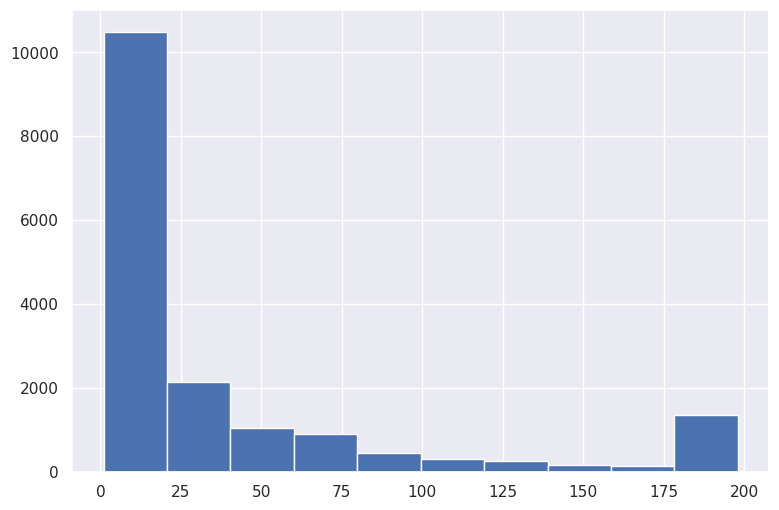

In [63]:
# распределение по пользователям количества пройденных заданий

(
    events_data[events_data['action'] == 'passed']
    .groupby('user_id', as_index=False)
    .agg({'step_id': 'count'})
    .rename(columns={'step_id':'количество_сданных_заданий'})
    .количество_сданных_заданий.hist()
);

# фильтруя по пользователям, которые прошли хоть что-то можем поятерять данные
events_data[events_data['action'] == 'passed'].user_id.nunique(), events_data.user_id.nunique()

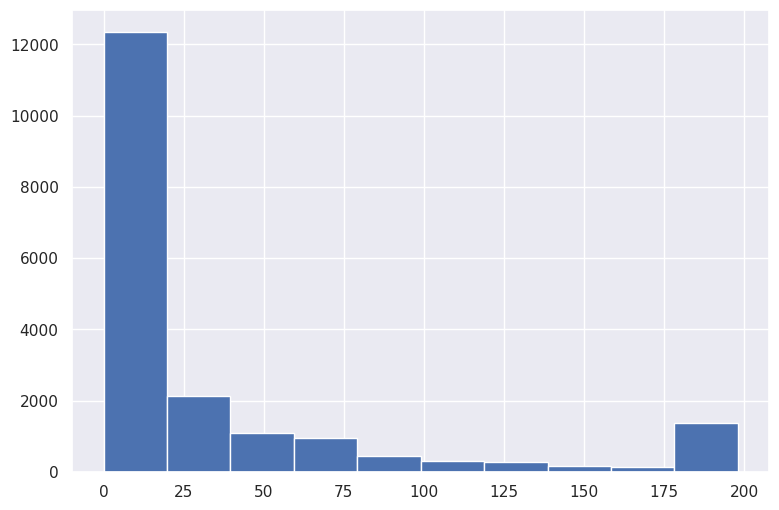

In [68]:
events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count',
                        fill_value=0
                       ).reset_index().passed.hist();